## Create Heapmap for paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd  

In [2]:
patt_4 = pickle.load( open( "orig_4_patt_7.pickle", "rb" ))
patt_3_7 = pickle.load( open( "3_patt_7.pickle", "rb" ))
patt_3_8 = pickle.load( open( "3_patt_8.pickle", "rb" ))
patt_7_7 = pickle.load( open( "7_patt_7.pickle", "rb" ))
patt_7_8 = pickle.load( open( "7_patt_8.pickle", "rb" ))

pacq_4 = pickle.load( open( "4_pacq_7.pickle", "rb" ))
pacq_3_7 = pickle.load( open( "3_pacq_7.pickle", "rb" ))
pacq_3_8 = pickle.load( open( "3_pacq_8.pickle", "rb" ))
pacq_7_7 = pickle.load( open( "7_pacq_7.pickle", "rb" ))
pacq_7_8 = pickle.load( open( "7_pacq_8.pickle", "rb" ))
pacq_4_word_7 = pickle.load( open( "4_word_pacq_7.pickle", "rb" ))
pacq_4_word_8 = pickle.load( open( "4_word_pacq_8.pickle", "rb" ))
pacq_4_visual_7 = pickle.load( open( "4_visual_pacq_7.pickle", "rb" ))
pacq_4_visual_8 = pickle.load( open( "4_visual_pacq_8.pickle", "rb" ))

cos_3_7 = pickle.load( open( "3_cos_7.pickle", "rb" ))
cos_3_8 = pickle.load( open( "3_cos_8.pickle", "rb" ))
cos_vis_7 = pickle.load( open( "visual_cos_7.pickle", "rb" ))
cos_vis_8 = pickle.load( open( "visual_cos_8.pickle", "rb" ))

In [3]:
tests = [patt_4, patt_3_7, patt_3_8, patt_7_7, patt_7_8, 
         pacq_4, pacq_3_7, pacq_3_8, pacq_7_7, pacq_7_8, 
         pacq_4_word_7, pacq_4_word_8, pacq_4_visual_7, 
         pacq_4_visual_8]

cos_tests = [cos_3_7, cos_3_8,cos_vis_7, cos_vis_8,]

In [4]:
# These are the tests with only 23 iterations 
# Add a nan value for the last two so to mask them in the heatmap
pacq_4_word_7.append((np.nan,1))
pacq_4_word_7.append((np.nan,1))
pacq_4_word_8.append((np.nan,1))
pacq_4_word_8.append((np.nan,1))
pacq_4_visual_7.append((np.nan,1))
pacq_4_visual_7.append((np.nan,1))
pacq_4_visual_8.append((np.nan,1))
pacq_4_visual_8.append((np.nan,1))

In [5]:
len(pacq_4_visual_7)

25

In [34]:
# create a dictionary with my data
data_dict = {}
data_dict['test_name'] = ['pref attach (4)', 'pref attach (3)(.7)','pref attach (3)(.8)', 'pref attach (7)(.7)',
                          'pref attach (7)(.8)',
                          'pref acquis (4)', 'pref acquis (3)(.7)', 'pref acquis (3)(.8)',  
                          'pref acquis (7)(.7)', 'pref acquis (7)(.8)', 'pref acquis (4+word)(.7)', 
                          'pref acquis (4+word)(.8)', 'pref acquis (4+visual)(.7)', 'pref acquis (4+visual)(.8)']

cosine_dict = {}
cosine_dict['test_name']= ['cosine (3)(.7)', 'cosine (3)(.8)','cosine + visual (.7)', 'cosine + visual (.8)']


p_value = []
for i in range(len(patt_4)):
    data_dict[i] = [a_list[i][0] for a_list in tests]
    p_value.append([a_list[i][1] for a_list in tests])
    
cos_p_value = []
for i in range(len(cos_3_7)):
    cosine_dict[i] = [a_list[i][0] for a_list in cos_tests]
    cos_p_value.append([a_list[i][1] for a_list in cos_tests])


In [35]:
def create_annotation(p_values, N, M):
    an = np.zeros((N, M))

    counter = 0
    for p in p_values:
        curr = []
        for val in p:
            if val < 0.05:

                curr.append(val)

            else:
                curr.append(float("NaN"))

#         print(curr)
        for i in range(len(curr)):
    #         print('an', an[i][i])
            an[i][counter] = curr[i]
        counter = counter+1


    return an

In [36]:
data_an = create_annotation(p_value, 14, 25)

In [37]:
anns = pd.DataFrame(data_an)
anns.shape
type(anns)

pandas.core.frame.DataFrame

In [38]:
df = pd.DataFrame(data_dict)
df.set_index('test_name', inplace=True)
df.shape
type(df)

pandas.core.frame.DataFrame

In [39]:
annotations = anns.astype(str)
annotations[np.isnan(anns)] = ""

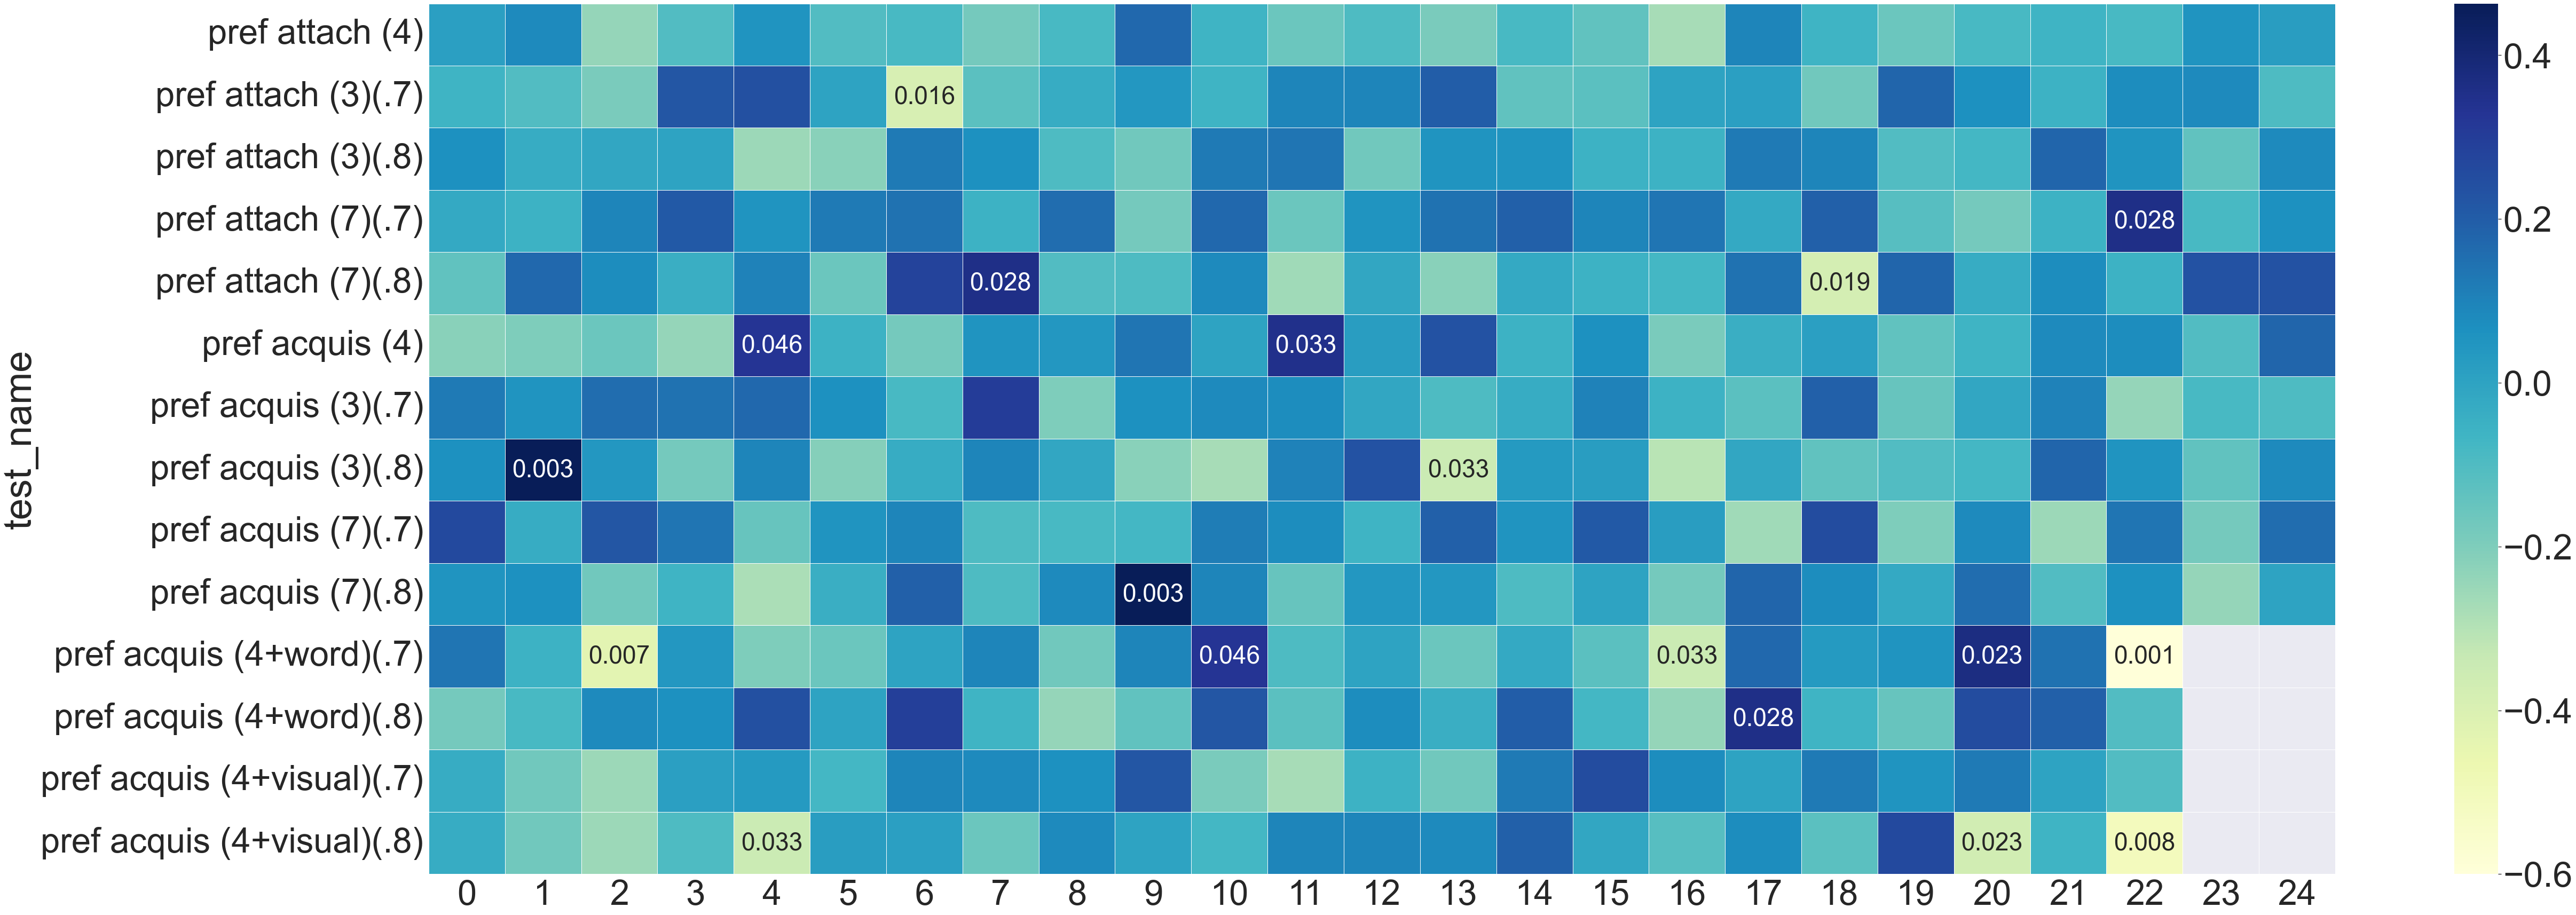

In [40]:
fig, ax = plt.subplots(figsize=(80,30))     

sns.set(font_scale=6)
ax = sns.heatmap( df, annot=annotations, fmt=".5s", cmap="YlGnBu", annot_kws={"size": 46}, linewidths=.5, ax=ax)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 65)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 65)
# sns.set(font_scale=2)
# ax.legend(fontsize=35)
# sns.set(font_scale=16) # font size 2


plt.savefig('heatmap_1.png',  facecolor ="w", pad_inches = 1)

In [28]:
cos_an = create_annotation(cos_p_value, 4, 23)

In [29]:
cos_anns = pd.DataFrame(cos_an)
cos_anns.shape
type(cos_anns)

pandas.core.frame.DataFrame

In [30]:
df = pd.DataFrame(cosine_dict)
df.set_index('test_name', inplace=True)
df.shape
type(df)

pandas.core.frame.DataFrame

In [31]:
cos_annotations = cos_anns.astype(str)
cos_annotations[np.isnan(cos_anns)] = ""

ValueError: The number of FixedLocator locations (23), usually from a call to set_ticks, does not match the number of ticklabels (25).

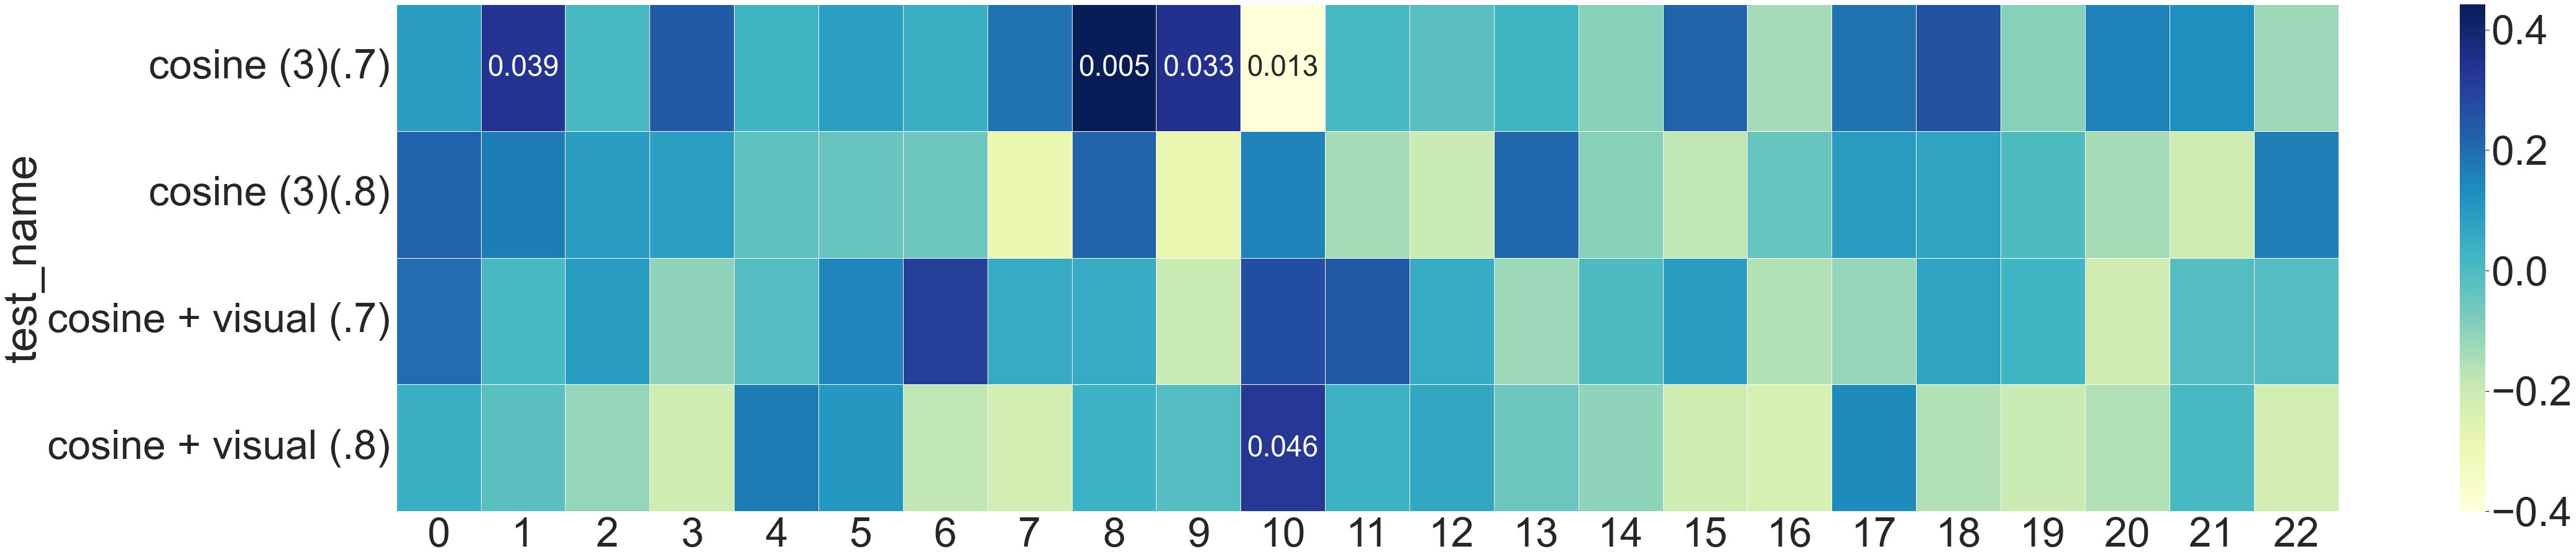

In [32]:
fig, co = plt.subplots(figsize=(70,15))     

sns.set(font_scale=6)
co = sns.heatmap( df, annot=cos_annotations, fmt=".5s", cmap="YlGnBu", annot_kws={"size": 46}, linewidths=.5, ax=co)
co.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 65)
co.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 65)
# sns.set(font_scale=2)
# ax.legend(fontsize=35)
# sns.set(font_scale=16) # font size 2


plt.savefig('cos_heatmap.png',  facecolor ="w", pad_inches = 1)